In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

from fastai.plots import *

PATH = "data/planet/"
from fastai.plots import *
from planet import f2

In [3]:
metrics = [f2]
f_model = resnet34

label_csv = f'{PATH}train_v2.csv'
val_idxs = [0]

def get_data(sz,bs=24):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms, bs=bs,
                                        suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')
data = get_data(sz=256)
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
learn.load(f'256')

In [4]:
n = len(learn.data.test_ds.fnames)
np.random.seed(0) # seed = 0
idxs = np.random.permutation(n)[:1]

In [23]:
# will return [ndarray, labels] for list(indices) in test-dataloader; [0] for [ndarray]
# test_array = learn.data.test_dl.dl.get_batch(idxs)[0]
test_array = learn.data.test_ds.get_x(idxs[0])
test_name  = learn.data.test_ds.fnames[idxs[0]]

In [24]:
test_array = np.rollaxis(test_array, -1, 0)
test_array.shape

(3, 256, 256)

In [25]:
test_array = np.array([test_array])
test_array.shape

(1, 3, 256, 256)

In [15]:
# run predictions on ndarrays of test_array (index 0)
test_preds = learn.predict_array(test_array)

In [ ]:
img = Image.open(f'{PATH}{test_name}')
plt.imshow(img)

In [28]:
def rand_prediction(seed=0):
    # pull class names
    classes = np.array(learn.data.classes)
    
    # get random index
    n = len(learn.data.test_ds.fnames)
    np.random.seed(seed) # seed = 0 default
    idxs = np.random.permutation(n)[:1]
    
    # pull random data-image and filename
    test_array = learn.data.test_ds.get_x(idxs[0])
    test_name  = learn.data.test_ds.fnames[idxs[0]]
    
    # convert test_array to 4D tensor
    test_array = np.rollaxis(test_array, -1, 0)
    test_array = np.array([test_array])
    
    # run prediction
    test_preds = learn.predict_array(test_array)[0]
    
    # format predicted tags
    tags = [' '.join(classes[np.where(pred >= 0.19)]) for pred in test_preds]
    
    # display image:
    img = Image.open(f'{PATH}{test_name}')
    plt.imshow(img)
    
    # print image filename, index and predicted tags
    print(f"filename:   {test_name}")
    print(f"file index: idxs[0]")
    print(f"Predicted Tags: {tags}")

filename:   test-jpg/test_6021.jpg
file index: idxs[0]
Predicted Tags: ['', '', '', '', '', 'agriculture', '', '', '', '', '', '', 'agriculture', '', '', '', '']


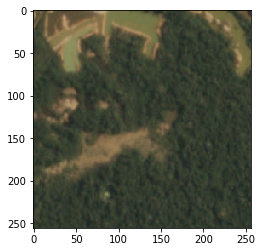

In [29]:
rand_prediction(0)

In [ ]:
classes = np.array(learn.data.classes)
tags = [' '.join(classes[np.where(pred >= 0.19)]) for pred in test_preds]

In [ ]:
tags

In [ ]:
test_preds

In [ ]:
learn.data.test_ds.fnames[idxs[0]]

In [ ]:
learn.data.classes

In [ ]:
# def get_ith(path,i): return glob(f'{path}/*.*')[i]
# test_path = f'{PATH}test-jpg/'
# list_paths = [get_ith(f'{test_path}', i) for i in range(2)]
# plots_from_files(list_paths, titles=[f'Image {i}' for i in range(2)], maintitle='Amazon Satellite Imagery Sample')

In [ ]:
test_array[0][0].shape